<a href="https://colab.research.google.com/github/APruner-23/Malicious_URL_Detection/blob/main/DeepNN_binary.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Deep Neural Network for detecting Malicious URLs (Binary classification)

In this Colab Notebook we create a model with Tensorflow and evaluate its performances on detecting Malicious URLs


In [1]:
# Imports
import pandas as pd
import numpy as np
import tensorflow as tf
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, confusion_matrix
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, BatchNormalization
from tensorflow.keras.callbacks import EarlyStopping, ReduceLROnPlateau
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.utils import to_categorical
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
# Load the dataset csv file located in the Github Repository
# https://github.com/APruner-23/Malicious_URL_Detection.git

dataset_file_link = 'https://raw.githubusercontent.com/APruner-23/Malicious_URL_Detection/main/updated_malicious_phish_with_tld.csv'
urldata = pd.read_csv(dataset_file_link)

In [3]:
binary_class_dictionary = {
    'benign': 0,
    'hostile': 1,
}

In [4]:
# Modify the 'type' column to contain 'benign' or 'hostile'
urldata['type'] = urldata['type'].apply(lambda x: 'benign' if x == 'benign' else 'hostile')

# Verify the changes
print(urldata['type'].value_counts())
print(urldata.head())

type
benign     428103
hostile    223088
Name: count, dtype: int64
                                                 url     type  url_length  \
0                                   br-icloud.com.br  hostile          16   
1                mp3raid.com/music/krizz_kaliko.html   benign          35   
2                    bopsecrets.org/rexroth/cr/1.htm   benign          31   
3  http://www.garage-pirenne.be/index.php?option=...  hostile          88   
4  http://adventure-nicaragua.net/index.php?optio...  hostile         235   

   hostname_length  path_length  fd_length  tld_dangerosity  count-  count@  \
0                0           16          0              3.0       1       0   
1                0           35          5              3.0       0       0   
2                0           31          7              3.0       0       0   
3               21           10          9              2.0       1       0   
4               23           10          9              3.0       1       0

In [5]:
# After dataset split, remember to also split those 2 arrays
# Creation of y array
y = urldata['type'].map(binary_class_dictionary).values
# Convert to a numpy array
#y = np.array(labels)
urls = [url for url in urldata['url']]

# Now i can drop url and type
urldata = urldata.drop(columns=['type', 'url'])

# Create x matrix
x = urldata.values

In [6]:
# First, split the data into training and a combined test/validation set (temporary dataset)
x_train, x_temp, y_train, y_temp, url_train, url_temp = train_test_split(
    x, y, urls, test_size=0.3)

# Then, split the temporary set into separate test and validation sets
x_test, x_val, y_test, y_val, url_test, url_val = train_test_split(
    x_temp, y_temp, url_temp, test_size=0.5)

# Print the shapes to verify the splits
print("Training set:", x_train.shape, y_train.shape, len(url_train))
print("Test set:", x_test.shape, y_test.shape, len(url_test))
print("Validation set:", x_val.shape, y_val.shape, len(url_val))

Training set: (455833, 19) (455833,) 455833
Test set: (97679, 19) (97679,) 97679
Validation set: (97679, 19) (97679,) 97679


In [7]:
# Convert the labels to categorical
y_train = to_categorical(y_train, num_classes=2)
y_val = to_categorical(y_val, num_classes=2)
y_test = to_categorical(y_test, num_classes=2)

# Final model
model = Sequential([
    Dense(256, input_shape=(x_train.shape[1],), activation='relu', kernel_regularizer=tf.keras.regularizers.l2(0.001)),
    BatchNormalization(),
    Dropout(0.5),
    Dense(128, activation='relu', kernel_regularizer=tf.keras.regularizers.l2(0.001)),
    BatchNormalization(),
    Dropout(0.5),
    Dense(128, activation='relu', kernel_regularizer=tf.keras.regularizers.l2(0.001)),
    BatchNormalization(),
    Dropout(0.5),
    Dense(64, activation='relu', kernel_regularizer=tf.keras.regularizers.l2(0.001)),
    BatchNormalization(),
    Dropout(0.5),
    Dense(2, activation='softmax')
])

optimizer = Adam(learning_rate=0.001)

# Compile the model
model.compile(optimizer=optimizer, loss='categorical_crossentropy', metrics=['accuracy'])

# Define callbacks
early_stopping = EarlyStopping(monitor='val_loss', patience=15, restore_best_weights=True)
reduce_lr = ReduceLROnPlateau(monitor='val_loss', factor=0.2, patience=5, min_lr=0.00001)

# Train the model
history = model.fit(x_train, y_train, epochs=100, batch_size=64, validation_data=(x_val, y_val), callbacks=[early_stopping, reduce_lr])

# Evaluate the model on the test set
test_loss, test_accuracy = model.evaluate(x_test, y_test)
print(f'Test accuracy: {test_accuracy}')

model.summary()

Epoch 1/100
7123/7123 [==============================] - 45s 6ms/step - loss: 0.3607 - accuracy: 0.9075 - val_loss: 0.2162 - val_accuracy: 0.9361 - lr: 0.0010
Epoch 2/100
7123/7123 [==============================] - 40s 6ms/step - loss: 0.2585 - accuracy: 0.9209 - val_loss: 0.2185 - val_accuracy: 0.9435 - lr: 0.0010
Epoch 3/100
7123/7123 [==============================] - 39s 5ms/step - loss: 0.2518 - accuracy: 0.9228 - val_loss: 0.2339 - val_accuracy: 0.9297 - lr: 0.0010
Epoch 4/100
7123/7123 [==============================] - 39s 5ms/step - loss: 0.2480 - accuracy: 0.9238 - val_loss: 0.2101 - val_accuracy: 0.9423 - lr: 0.0010
Epoch 5/100
7123/7123 [==============================] - 41s 6ms/step - loss: 0.2453 - accuracy: 0.9251 - val_loss: 0.2014 - val_accuracy: 0.9416 - lr: 0.0010
Epoch 6/100
7123/7123 [==============================] - 41s 6ms/step - loss: 0.2449 - accuracy: 0.9250 - val_loss: 0.2135 - val_accuracy: 0.9411 - lr: 0.0010
Epoch 7/100
7123/7123 [=======================

3053/3053 [==============================] - 6s 2ms/step
              precision    recall  f1-score   support

      benign       0.96      0.98      0.97     64323
     hostile       0.96      0.92      0.94     33356

    accuracy                           0.96     97679
   macro avg       0.96      0.95      0.95     97679
weighted avg       0.96      0.96      0.96     97679



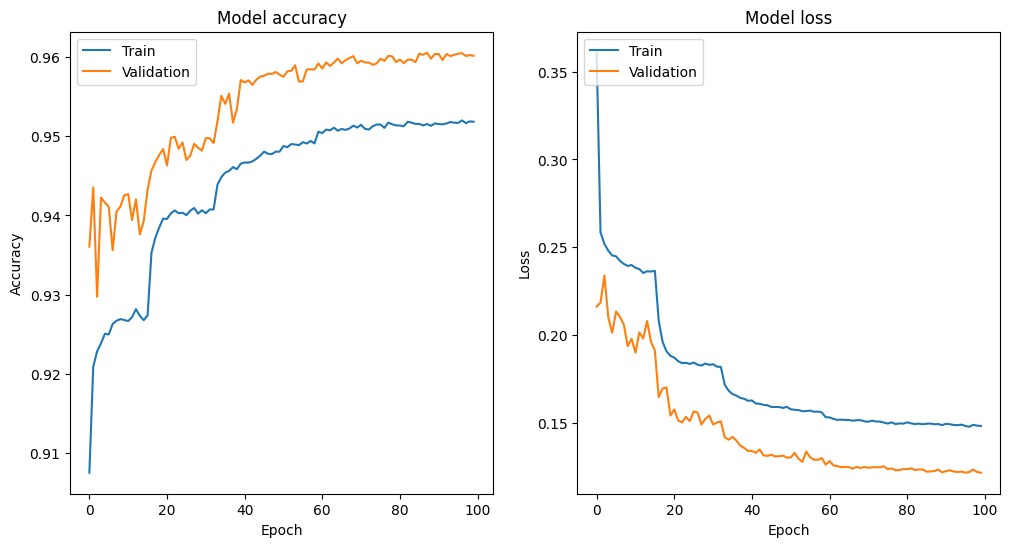

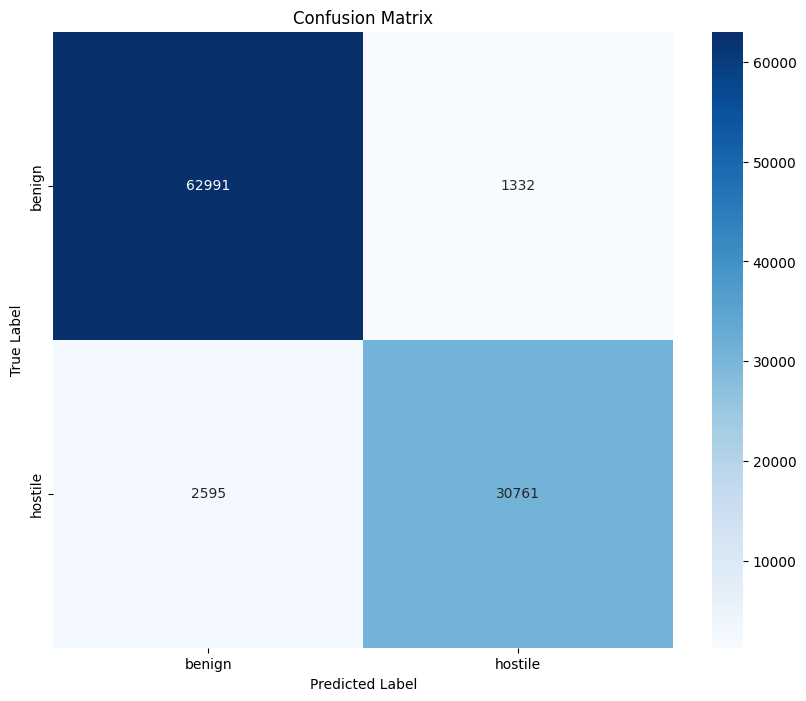

In [8]:
# Generate classification report
y_pred = model.predict(x_test)
y_pred_classes = np.argmax(y_pred, axis=1)
y_true = np.argmax(y_test, axis=1)
print(classification_report(y_true, y_pred_classes, target_names=binary_class_dictionary.keys()))

# Plot training & validation accuracy values
plt.figure(figsize=(12, 6))

plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend(['Train', 'Validation'], loc='upper left')

# Plot training & validation loss values
plt.subplot(1, 2, 2)
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend(['Train', 'Validation'], loc='upper left')

plt.show()

# Plot confusion matrix as a heatmap
conf_matrix = confusion_matrix(y_true, y_pred_classes)
plt.figure(figsize=(10, 8))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=binary_class_dictionary.keys(), yticklabels=binary_class_dictionary.keys())
plt.title('Confusion Matrix')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.show()